In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [3]:
df = pd.read_csv('Data.csv', encoding='cp1250')

In [4]:
df.columns

Index(['Kód okresu', 'Název okresu', 'Věk', 'Pohlaví', 'Rodinný stav',
       'Nejvyšší dosažené vzdělání', 'Počet osob'],
      dtype='object')

In [5]:
df.head()

,Kód okresu,Název okresu,Věk,Pohlaví,Rodinný stav,Nejvyšší dosažené vzdělání,Počet osob
0,CZ0201,Benešov,0,muž,Svobodný/svobodná,nedefinováno - osoby ve věku 0–14 let,507
1,CZ0201,Benešov,0,žena,Svobodný/svobodná,nedefinováno - osoby ve věku 0–14 let,504
2,CZ0201,Benešov,1,muž,Svobodný/svobodná,nedefinováno - osoby ve věku 0–14 let,513
3,CZ0201,Benešov,1,žena,Svobodný/svobodná,nedefinováno - osoby ve věku 0–14 let,538
4,CZ0201,Benešov,2,muž,Svobodný/svobodná,nedefinováno - osoby ve věku 0–14 let,565


In [6]:
df.dtypes

Kód okresu                    object
Název okresu                  object
Věk                           object
Pohlaví                       object
Rodinný stav                  object
Nejvyšší dosažené vzdělání    object
Počet osob                     int64
dtype: object

In [9]:
for kod in df['Kód okresu'].unique():
    print(kod, df[df['Kód okresu'] == kod]['Název okresu'].unique())

CZ0201 ['Benešov']
CZ0202 ['Beroun']
CZ0203 ['Kladno']
CZ0204 ['Kolín']
CZ0205 ['Kutná Hora']
CZ0206 ['Mělník']
CZ0207 ['Mladá Boleslav']
CZ020A ['Praha-západ']
CZ0208 ['Nymburk']
CZ0209 ['Praha-východ']
CZ020B ['Příbram']
CZ020C ['Rakovník']
CZ0311 ['České Budějovice']
CZ0312 ['Český Krumlov']
CZ0313 ['Jindřichův Hradec']
CZ0314 ['Písek']
CZ0315 ['Prachatice']
CZ0316 ['Strakonice']
CZ0317 ['Tábor']
CZ0321 ['Domažlice']
CZ0322 ['Klatovy']
CZ0323 ['Plzeň-město']
CZ0324 ['Plzeň-jih']
CZ0325 ['Plzeň-sever']
CZ0326 ['Rokycany']
CZ0327 ['Tachov']
CZ0411 ['Cheb']
CZ0412 ['Karlovy Vary']
CZ0413 ['Sokolov']
CZ0421 ['Děčín']
CZ0422 ['Chomutov']
CZ0423 ['Litoměřice']
CZ0424 ['Louny']
CZ0425 ['Most']
CZ0426 ['Teplice']
CZ0427 ['Ústí nad Labem']
CZ0511 ['Česká Lípa']
CZ0512 ['Jablonec nad Nisou']
CZ0513 ['Liberec']
CZ0514 ['Semily']
CZ0521 ['Hradec Králové']
CZ0522 ['Jičín']
CZ0523 ['Náchod']
CZ0524 ['Rychnov nad Kněžnou']
CZ0525 ['Trutnov']
CZ0531 ['Chrudim']
CZ0532 ['Pardubice']
CZ0533 ['Svitavy

# Pohlaví - vzdělání

In [7]:
df.groupby('Pohlaví')

In [8]:
df.shape

(404968, 7)

In [9]:
def split_by(df: pd.DataFrame, column: str) -> list:
    return [df[df[column] == column_type]['Věk'] for column_type in df[column].unique()]

In [22]:
def convert_age_to_int(s: str) -> int:
    return 100 if s.endswith('+') else int(s)
df['Věk'] = df['Věk'].apply(convert_age_to_int)

In [ ]:
education = pd.DataFrame(columns=['Věk', 'Pohlaví', 'Vysokoškolsky vzdělaný', 'Počet osob', 'Poměr vzdělaných'])
for age in df['Věk'].unique():
    df_age = df[df['Věk'] == age]
    for gender in ('muž', 'žena'):
        df_gender = df_age[df_age['Pohlaví'] == gender]
        total = df_gender['Počet osob'].astype(int).sum()
        educated = df_gender[df_gender['Nejvyšší dosažené vzdělání'].isin(['bakalářské', 'vyšší odborné vzdělání', 'magisterské', 'doktorské'])]['Počet osob'].astype(int).sum()
        percentage_educated = educated / total * 100
        new_row = pd.DataFrame([[age, gender, educated, total, percentage_educated]], columns = education.columns)
        if education.empty:
            education = new_row
        else:
            education = pd.concat([education, new_row])

df_edu = education.pivot(index = 'Věk', columns = 'Pohlaví', values = 'Vysokoškolsky vzdělaný')
df_pop = education.pivot(index = 'Věk', columns = 'Pohlaví', values = 'Počet osob')
df_perc = education.pivot(index = 'Věk', columns = 'Pohlaví', values = 'Poměr vzdělaných')

In [140]:
def group_ages(df: pd.DataFrame, age_column: str) -> pd.DataFrame:
    df = df.reset_index()
    age_bins = [19, 29, 39, 49, 59, 69, 79, 100]
    age_labels = ['20-29', '30-39','40-49', '50-59', '60-69', '70-79', '80+']
    df[age_column] = pd.cut(df[age_column], bins=age_bins, labels=age_labels, right=True)
    return df.groupby(age_column).sum().reset_index()

df_edu_age = group_ages(df_edu, 'Věk')
df_pop_age = group_ages(df_pop, 'Věk')
df_perc_age = pd.DataFrame(columns=['Věk', 'muž', 'žena'])
for age in df_edu_age['Věk'].unique():
    edu_men = df_edu_age[df_edu_age['Věk'] == age]['muž'].iloc[0]
    edu_women = df_edu_age[df_edu_age['Věk'] == age]['žena'].iloc[0]
    pop_men = df_pop_age[df_pop_age['Věk'] == age]['muž'].iloc[0]
    pop_women = df_pop_age[df_pop_age['Věk'] == age]['žena'].iloc[0]
    perc_men = edu_men / pop_men * 100
    perc_women = edu_women / pop_women * 100
    new_row = pd.DataFrame([[age, perc_men, perc_women]], columns=df_perc_age.columns)
    if df_perc_age.empty:
        df_perc_age = new_row
    else:
        df_perc_age = pd.concat([df_perc_age, new_row])

C:\Users\svest\AppData\Local\Temp\ipykernel_11740\926376067.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(age_column).sum().reset_index()
C:\Users\svest\AppData\Local\Temp\ipykernel_11740\926376067.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(age_column).sum().reset_index()


In [109]:
import matplotlib.patches as mpatches

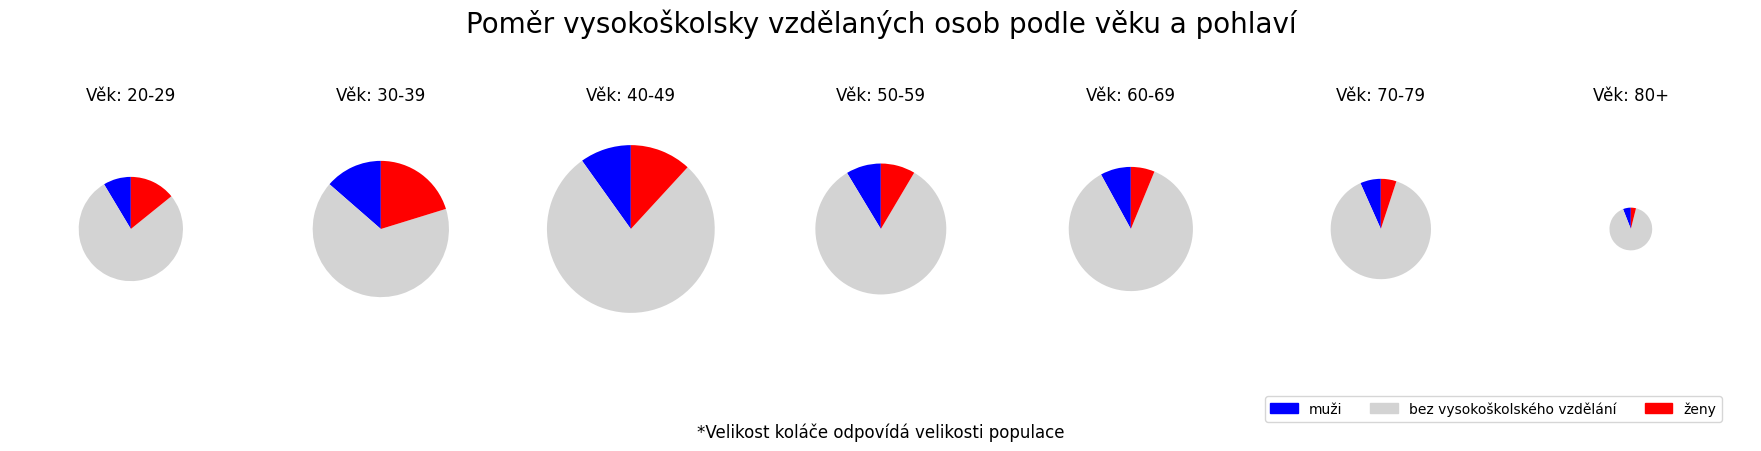

In [145]:
ages = df_edu_age['Věk'].tolist()
n = len(ages)
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(2.5*n, 4), constrained_layout = True)

for ax, age in zip(axes, ages):
    edu_m = df_edu_age .loc[df_edu_age ['Věk']==age, 'muž'].iloc[0]
    pop_m = df_pop_age .loc[df_pop_age ['Věk']==age, 'muž'].iloc[0]
    edu_f = df_edu_age .loc[df_edu_age ['Věk']==age, 'žena'].iloc[0]
    pop_f = df_pop_age .loc[df_pop_age ['Věk']==age, 'žena'].iloc[0]

    ax.pie(
        [edu_m, pop_m + pop_f - edu_m - edu_f, edu_f],
        colors=['blue','lightgray','red'],
        startangle=90,
        radius=(pop_m + pop_f) / 2_000_000,
    )

    ax.set_title(f'Věk: {age}')

blue_patch  = mpatches.Patch(color='blue',   label='muži')
gray_patch  = mpatches.Patch(color='lightgray', label='bez vysokoškolského vzdělání')
red_patch   = mpatches.Patch(color='red',    label='ženy')

fig.suptitle('Poměr vysokoškolsky vzdělaných osob podle věku a pohlaví',fontsize=20, y=1.05)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend([blue_patch, gray_patch, red_patch], ['muži', 'bez vysokoškolského vzdělání', 'ženy'],
           loc='upper center', bbox_to_anchor=(0.85, 0.1), ncol=3)
fig.text(0.5, -0.02,
         "*Velikost koláče odpovídá velikosti populace",
         ha="center", fontsize=12)
plt.show()

fig.savefig(
    "populace_vzdelani_podle_vekove_skupiny.pdf",
    format="pdf",
    bbox_inches="tight"
)

In [124]:
plt.text?

Signature:
plt.text(
    x: 'float',
    y: 'float',
    s: 'str',
    fontdict: 'dict[str, Any] | None' = None,
    **kwargs,
) -> 'Text'
Docstring:
Add text to the Axes.

Add the text *s* to the Axes at location *x*, *y* in data coordinates,
with a default ``horizontalalignment`` on the ``left`` and
``verticalalignment`` at the ``baseline``. See
:doc:`/gallery/text_labels_and_annotations/text_alignment`.

Parameters
----------
x, y : float
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dict, default: None

    .. admonition:: Discouraged

       The use of *fontdict* is discouraged. Parameters should be passed as
       individual keyword arguments or using dictionary-unpacking
       ``text(..., **fontdict)``.

    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by `.rcParams`.

Retur

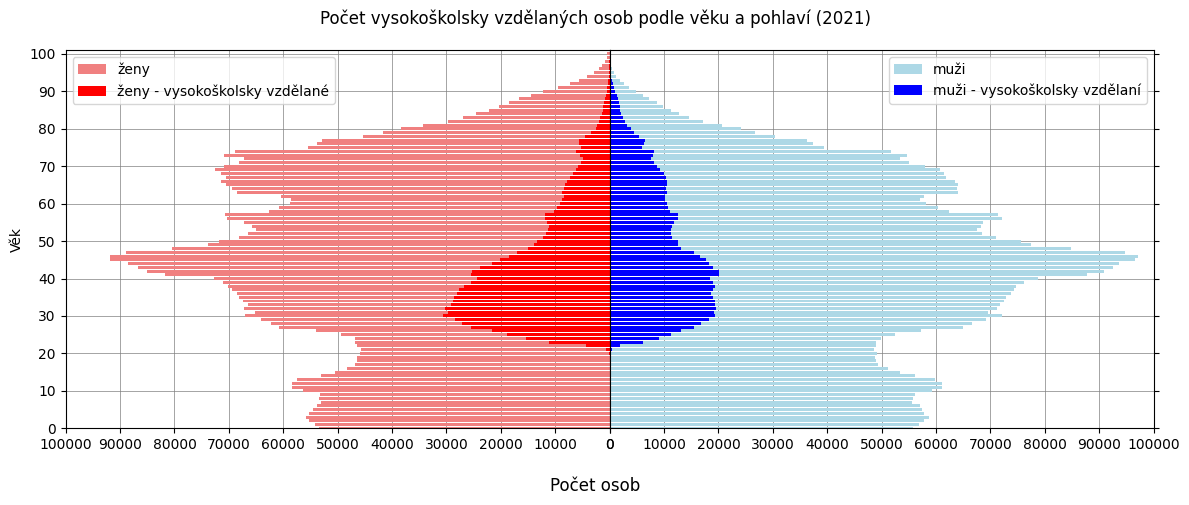

In [15]:
ages = df_edu.index
male = df_edu.get('muž')
female = df_edu.get('žena')
male_pop = df_pop.get('muž')
female_pop = df_pop.get('žena')
y = np.arange(len(ages))
height = 0.8
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True, gridspec_kw={'wspace': 0})

max_pop = 100000
locator = ticker.MultipleLocator(10000)
xticks = np.arange(0, max_pop+1, 10000)
yticks = np.arange(0, 101, 10)
fmt = ticker.FuncFormatter(lambda x, pos: f"{abs(int(x)):,}")



# Plot left
ax1.barh(y = y, width = -female_pop, height = height, label = 'ženy', color = 'lightcoral')
ax1.barh(y = y, width = -female, height = height, label = 'ženy - vysokoškolsky vzdělané', color = 'red')

ax1.set_xlim(-max_pop, 0)
ax1.set_xticks(-xticks)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: abs(int(x))))

ax1.set_ylabel('Věk')



# Plot right
ax2.barh(y = y, width = male_pop, height = height, label = 'muži', color = 'lightblue')
ax2.barh(y = y, width = male, height = height, label = 'muži - vysokoškolsky vzdělaní', color = 'blue')

ax2.set_xlim(0, max_pop)
ax2.set_xticks(xticks)

ax2.yaxis.tick_right()


# Both
for ax in (ax1, ax2):
    ax.set_ylim(0, 101)
    ax.set_yticks(yticks)
    ax.set_axisbelow(True)       
    ax.grid(axis='x', color='gray', linewidth=0.5)
    ax.grid(axis='y', color='gray', linewidth=0.5)
    ax.legend()

fig.suptitle("Počet vysokoškolsky vzdělaných osob podle věku a pohlaví (2021)")
fig.supxlabel("Počet osob")


plt.tight_layout()
plt.show()

fig.savefig(
    "populace_vzdelani.pdf",
    format="pdf",
    bbox_inches="tight"
)

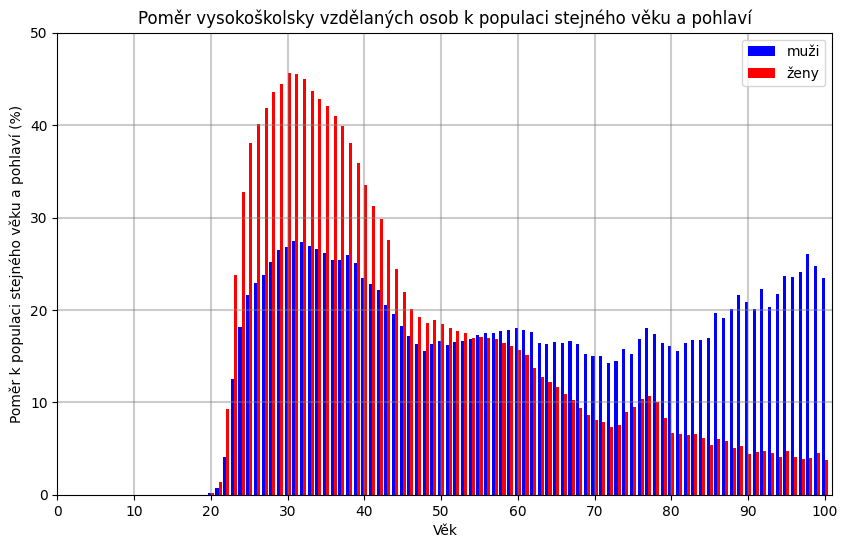

In [13]:
ages = df_perc.index
male = df_perc.get('muž')
female = df_perc.get('žena')
x = np.arange(len(ages))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))
xticks = np.arange(0, 101, 10)

ax.hlines(np.arange(10, 100, 10), xmin = 0, xmax = 200, color = 'grey', alpha = 0.4)
ax.bar(x = x - width / 2, height = male, width = width, label = 'muži', color = 'blue')
ax.bar(x = x + width / 2, height = female, width = width, label = 'ženy', color = 'red')

ax.set_xlim(0, 101)
ax.set_xlabel('Věk')
ax.set_xticks(xticks)
ax.vlines(np.arange(10, 100, 10), ymin = 0, ymax = 200, color = 'grey', alpha = 0.4)

ax.set_ylim(0, 50)
ax.set_ylabel('Poměr k populaci stejného věku a pohlaví (%)')

ax.set_title('Poměr vysokoškolsky vzdělaných osob k populaci stejného věku a pohlaví')
ax.legend()
plt.show()

fig.savefig(
    "pomer_populace_vzdelani.pdf",
    format="pdf",
    bbox_inches="tight"
)

In [10]:
df.columns

Index(['Kód okresu', 'Název okresu', 'Věk', 'Pohlaví', 'Rodinný stav',
       'Nejvyšší dosažené vzdělání', 'Počet osob'],
      dtype='object')

In [11]:
df["Rodinný stav"].unique()

array(['Svobodný/svobodná', 'Nezjištěno', 'Ženatý/vdaná', 'Vdovec/vdova',
       'Registrované partnerství trvající', 'Rozvedený/rozvedená',
       'Registrované partnerství zaniklé rozhodnutím soudu',
       'Registrované partnerství zaniklé úmrtím partnera/partnerky'],
      dtype=object)

In [14]:
columns = ['Municipality', 'Population', 'Divorced', 'Married', 'Gay_married', 'Educated']
data = pd.DataFrame(columns=columns)
for okres in df['Název okresu'].unique():
    df_okres = df[df['Název okresu'] == okres]
    population = df_okres['Počet osob'].astype(int).sum()
    divorced = df_okres[df_okres['Rodinný stav'] == 'Rozvedený/rozvedená']['Počet osob'].astype(int).sum()
    married = df_okres[df_okres['Rodinný stav'] == 'Rozvedený/rozvedená']['Počet osob'].astype(int).sum()
    gay = df_okres[df_okres['Rodinný stav'] == 'Registrované partnerství trvající']['Počet osob'].astype(int).sum()
    educated = df_okres[df_okres['Nejvyšší dosažené vzdělání'].isin(['bakalářské', 'vyšší odborné vzdělání', 'magisterské', 'doktorské'])]['Počet osob'].astype(int).sum()
    new_row = pd.DataFrame([[okres, population, divorced, married, gay, educated]], columns = columns)
    if data.empty:
        data = new_row
    else:
        data = pd.concat([data, new_row])

In [16]:
data.head(10)

,Municipality,Population,Divorced,Married,Gay_married,Educated
0,Benešov,100347,10915,10915,44,13206
0,Beroun,98073,10936,10936,61,14651
0,Kladno,166771,21428,21428,144,22629
0,Kolín,104227,12267,12267,61,13212
0,Kutná Hora,74918,8717,8717,23,9143
0,Mělník,110243,13353,13353,68,13429
0,Mladá Boleslav,128901,15158,15158,46,16740
0,Praha-západ,161593,16091,16091,99,38170
0,Nymburk,102727,12333,12333,70,13707
0,Praha-východ,197477,19958,19958,142,40054
